In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

## 0. Load Data

In [2]:
data = pd.read_csv('../data/data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


## 1. Data Analysis: First Sight

### How is the date distribuited?

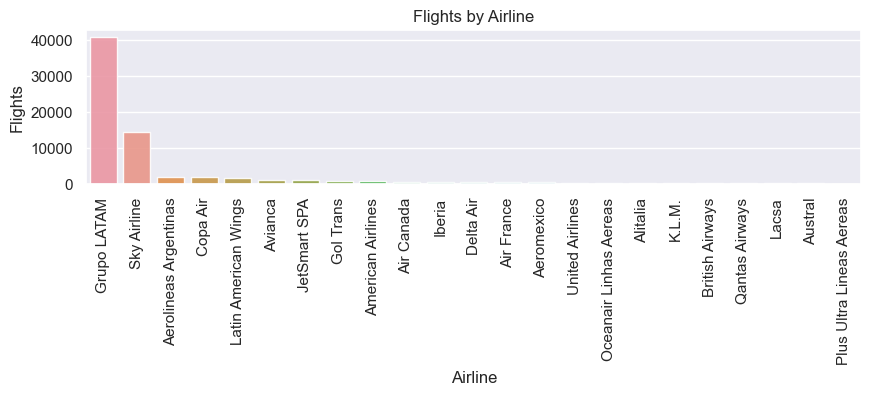

In [3]:
flights_by_airline = data['OPERA'].value_counts()
plt.figure(figsize = (10, 2))
sns.set(style="darkgrid")
sns.barplot(x=flights_by_airline.index, y=flights_by_airline.values, alpha=0.9)
plt.title('Flights by Airline')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Airline', fontsize=12)
plt.xticks(rotation=90)
plt.show()

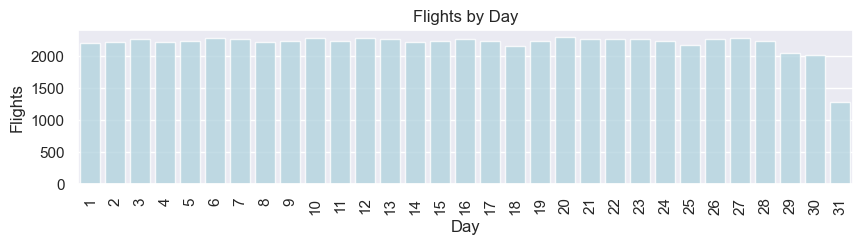

In [4]:
flights_by_day = data['DIA'].value_counts()
plt.figure(figsize = (10, 2))
sns.set(style = "darkgrid")
sns.barplot(x=flights_by_day.index, y=flights_by_day.values, color = 'lightblue', alpha=0.8)
plt.title('Flights by Day')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Day', fontsize=12)
plt.xticks(rotation=90)
plt.show()

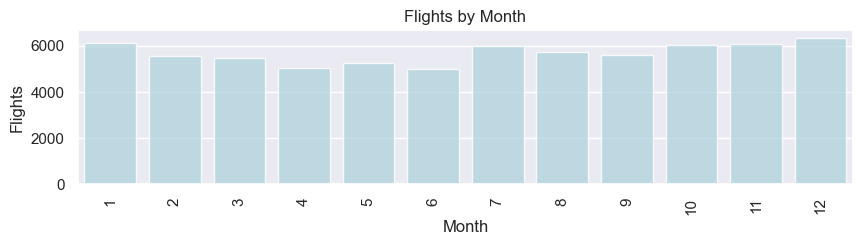

In [5]:
flights_by_month = data['MES'].value_counts()
plt.figure(figsize = (10, 2))
sns.set(style = "darkgrid")
sns.barplot(x=flights_by_month.index, y=flights_by_month.values, color = 'lightblue', alpha=0.8)
plt.title('Flights by Month')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation=90)
plt.show()

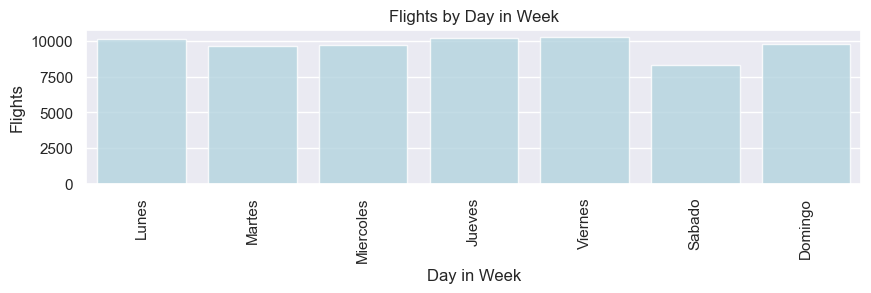

In [6]:
flights_by_day_in_week = data['DIANOM'].value_counts()
days = [
    flights_by_day_in_week.index[2], 
    flights_by_day_in_week.index[5], 
    flights_by_day_in_week.index[4], 
    flights_by_day_in_week.index[1], 
    flights_by_day_in_week.index[0], 
    flights_by_day_in_week.index[6], 
    flights_by_day_in_week.index[3]
]
values_by_day = [
    flights_by_day_in_week.values[2], 
    flights_by_day_in_week.values[5], 
    flights_by_day_in_week.values[4], 
    flights_by_day_in_week.values[1], 
    flights_by_day_in_week.values[0], 
    flights_by_day_in_week.values[6], 
    flights_by_day_in_week.values[3]
]
plt.figure(figsize = (10, 2))
sns.set(style="darkgrid")
sns.barplot(x=days, y=values_by_day, color = 'lightblue', alpha=0.8)
plt.title('Flights by Day in Week')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Day in Week', fontsize=12)
plt.xticks(rotation=90)
plt.show()

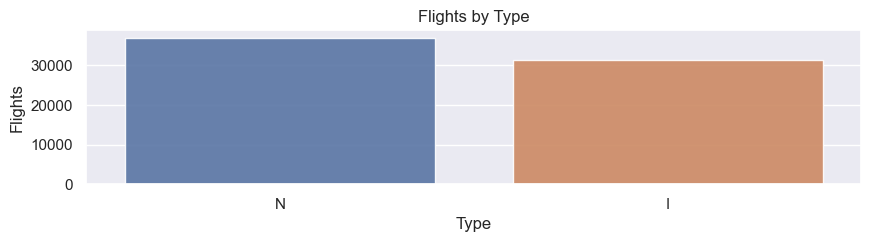

In [7]:
flights_by_type = data['TIPOVUELO'].value_counts()
sns.set(style="darkgrid")
plt.figure(figsize = (10, 2))
sns.barplot(x=flights_by_type.index, y=flights_by_type.values, alpha=0.9)
plt.title('Flights by Type')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Type', fontsize=12)
plt.show()

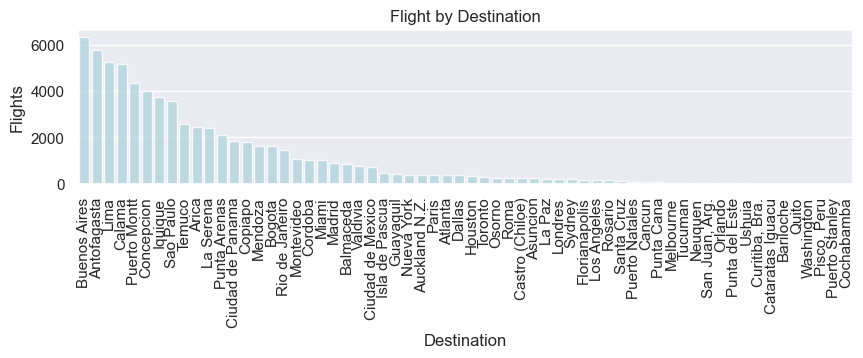

In [8]:
flight_by_destination = data['SIGLADES'].value_counts()
plt.figure(figsize = (10, 2))
sns.set(style="darkgrid")
sns.barplot(x=flight_by_destination.index, y=flight_by_destination.values, color = 'lightblue', alpha=0.8)
plt.title('Flight by Destination')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Destination', fontsize=12)
plt.xticks(rotation=90)

plt.show()

## 2. Features Generation

### 2.a. Period of Day

In [9]:
from datetime import datetime

def get_period_day(date):
    date_time = datetime.strptime(date, '%Y-%m-%d %H:%M:%S').time()
    morning_min = datetime.strptime("05:00", '%H:%M').time()
    morning_max = datetime.strptime("11:59", '%H:%M').time()
    afternoon_min = datetime.strptime("12:00", '%H:%M').time()
    afternoon_max = datetime.strptime("18:59", '%H:%M').time()
    evening_min = datetime.strptime("19:00", '%H:%M').time()
    evening_max = datetime.strptime("23:59", '%H:%M').time()
    night_min = datetime.strptime("00:00", '%H:%M').time()
    night_max = datetime.strptime("4:59", '%H:%M').time()
    
    if(date_time > morning_min and date_time < morning_max):
        return 'mañana'
    elif(date_time > afternoon_min and date_time < afternoon_max):
        return 'tarde'
    elif(
        (date_time > evening_min and date_time < evening_max) or
        (date_time > night_min and date_time < night_max)
    ):
        return 'noche'

In [10]:
data['period_day'] = data['Fecha-I'].apply(get_period_day)

### 2.b. High Season

In [11]:
from datetime import datetime

def is_high_season(fecha):
    fecha_año = int(fecha.split('-')[0])
    fecha = datetime.strptime(fecha, '%Y-%m-%d %H:%M:%S')
    range1_min = datetime.strptime('15-Dec', '%d-%b').replace(year = fecha_año)
    range1_max = datetime.strptime('31-Dec', '%d-%b').replace(year = fecha_año)
    range2_min = datetime.strptime('1-Jan', '%d-%b').replace(year = fecha_año)
    range2_max = datetime.strptime('3-Mar', '%d-%b').replace(year = fecha_año)
    range3_min = datetime.strptime('15-Jul', '%d-%b').replace(year = fecha_año)
    range3_max = datetime.strptime('31-Jul', '%d-%b').replace(year = fecha_año)
    range4_min = datetime.strptime('11-Sep', '%d-%b').replace(year = fecha_año)
    range4_max = datetime.strptime('30-Sep', '%d-%b').replace(year = fecha_año)
    
    if ((fecha >= range1_min and fecha <= range1_max) or 
        (fecha >= range2_min and fecha <= range2_max) or 
        (fecha >= range3_min and fecha <= range3_max) or
        (fecha >= range4_min and fecha <= range4_max)):
        return 1
    else:
        return 0

In [12]:
data['high_season'] = data['Fecha-I'].apply(is_high_season)

### 2.c. Difference in Minutes

In [13]:
def get_min_diff(data):
    fecha_o = datetime.strptime(data['Fecha-O'], '%Y-%m-%d %H:%M:%S')
    fecha_i = datetime.strptime(data['Fecha-I'], '%Y-%m-%d %H:%M:%S')
    min_diff = ((fecha_o - fecha_i).total_seconds())/60
    return min_diff

In [14]:
data['min_diff'] = data.apply(get_min_diff, axis = 1)

### 2.d. Delay

In [15]:
threshold_in_minutes = 15
data['delay'] = np.where(data['min_diff'] > threshold_in_minutes, 1, 0)

In [16]:
data.columns

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES', 'period_day', 'high_season',
       'min_diff', 'delay'],
      dtype='object')

## 3. Data Analysis: Second Sight

### How is the delay rate across columns?

In [17]:
def get_rate_from_column(data, column):
    delays = {}
    for _, row in data.iterrows():
        if row['delay'] == 1:
            if row[column] not in delays:
                delays[row[column]] = 1
            else:
                delays[row[column]] += 1

    total = data[column].value_counts().to_dict()
    
    rates = {}
    for name, total in total.items():
        if name in delays:
            rates[name] = round(100 * delays[name] / total, 2)
        else:
            rates[name] = 0
            
    return pd.DataFrame.from_dict(data = rates, orient = 'index', columns = ['Tasa (%)'])

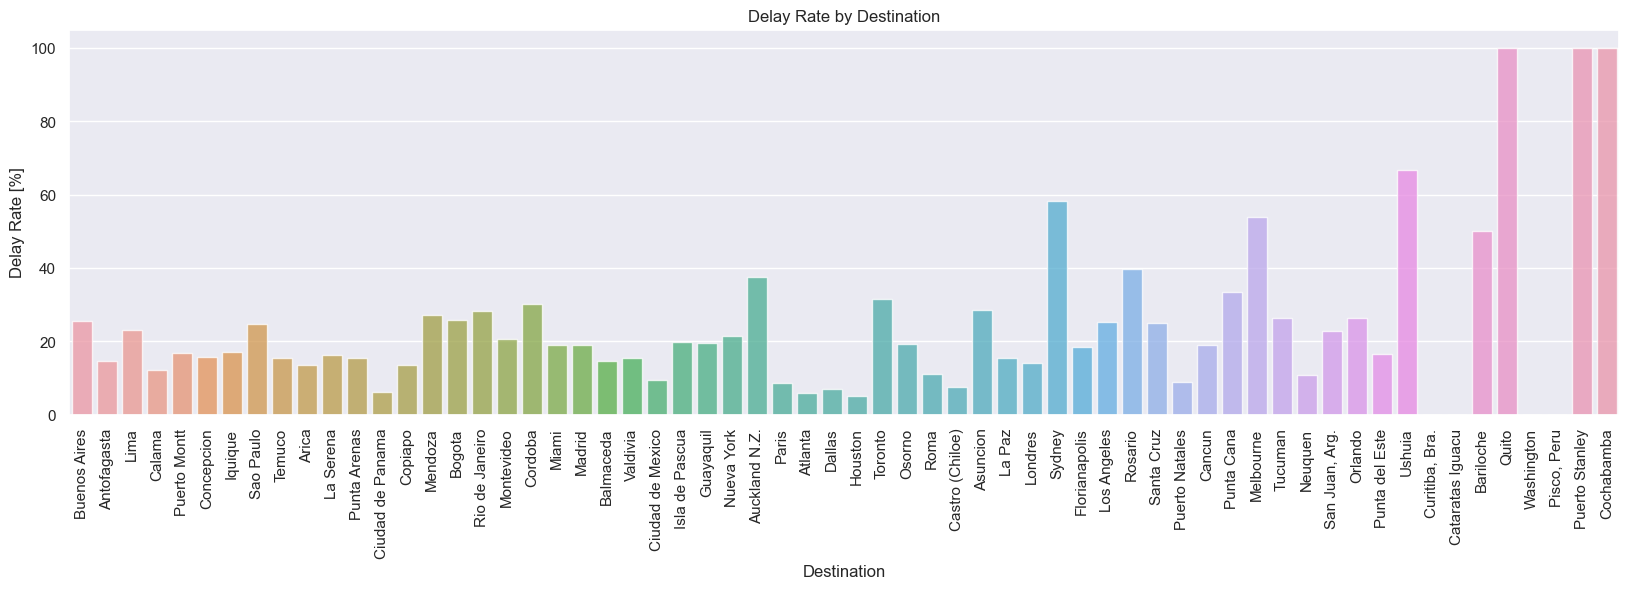

In [18]:
destination_rate = get_rate_from_column(data, 'SIGLADES')
destination_rate_values = data['SIGLADES'].value_counts().index
plt.figure(figsize = (20,5))
sns.set(style="darkgrid")
sns.barplot(x=destination_rate_values, y=destination_rate['Tasa (%)'], alpha = 0.75)
plt.title('Delay Rate by Destination')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Destination', fontsize=12)
plt.xticks(rotation=90)
plt.show()


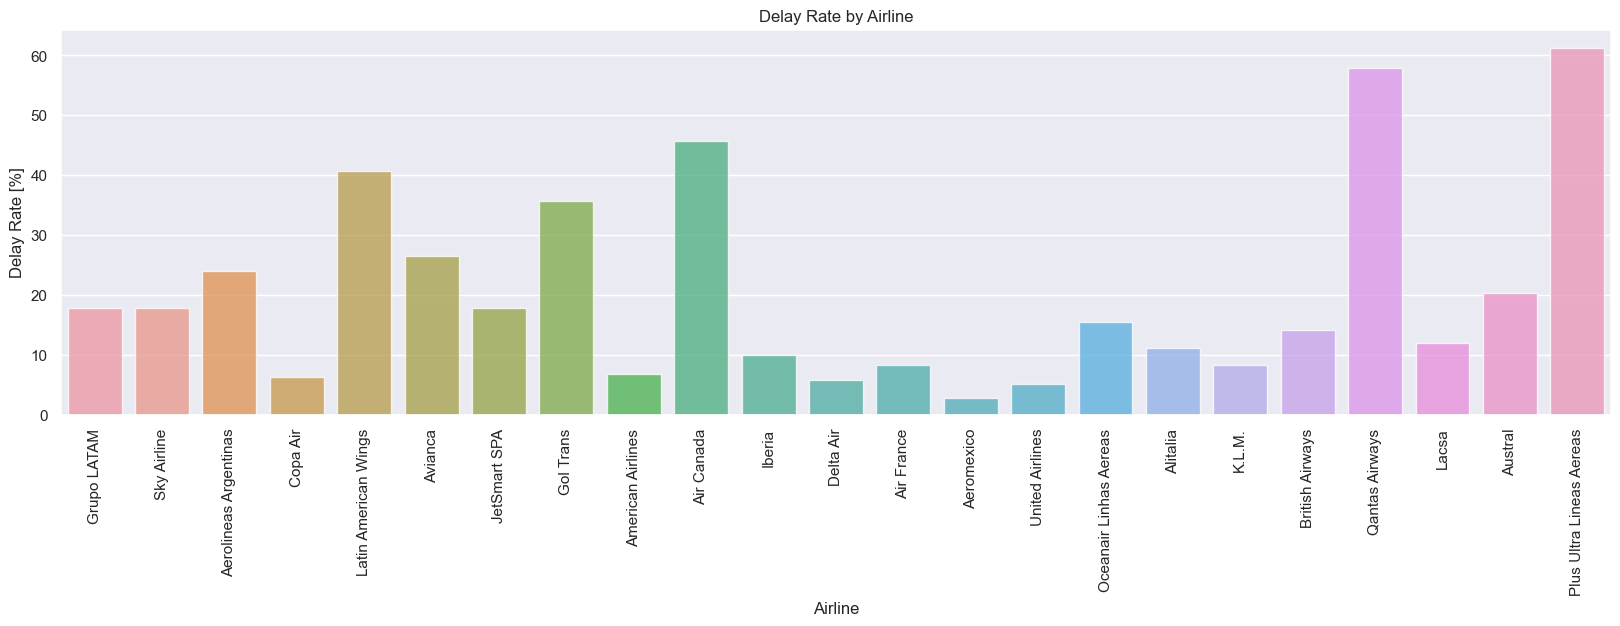

In [19]:
airlines_rate = get_rate_from_column(data, 'OPERA')
airlines_rate_values = data['OPERA'].value_counts().index
plt.figure(figsize = (20,5))
sns.set(style="darkgrid")
sns.barplot(x=airlines_rate_values, y=airlines_rate['Tasa (%)'], alpha = 0.75)
plt.title('Delay Rate by Airline')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Airline', fontsize=12)
plt.xticks(rotation=90)
plt.show()

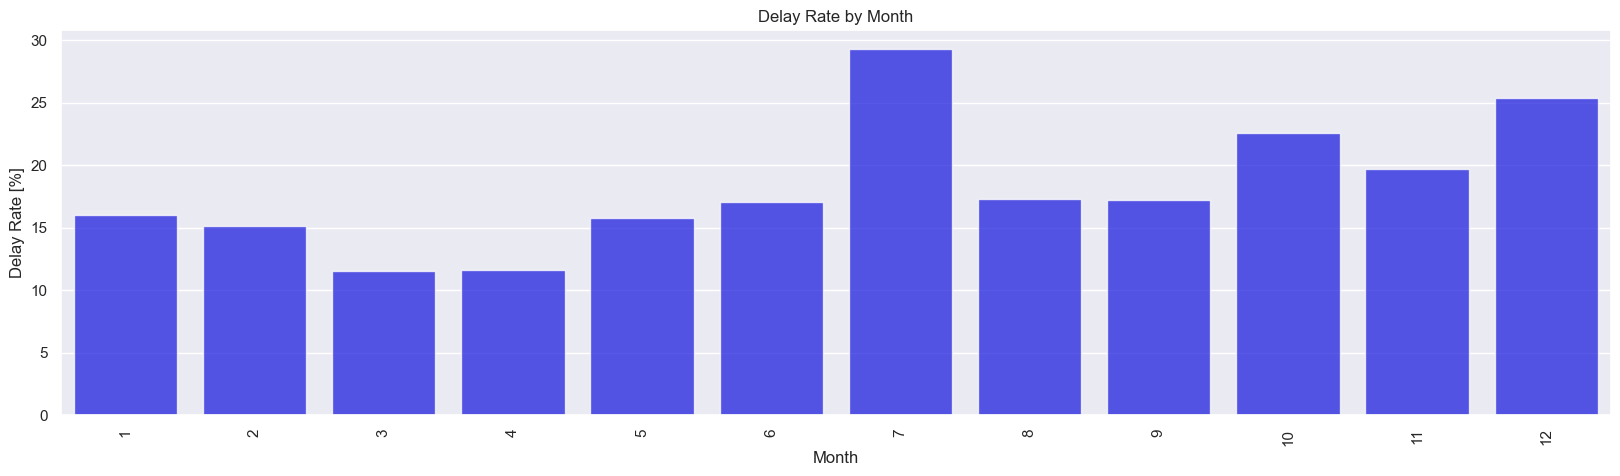

In [20]:
month_rate = get_rate_from_column(data, 'MES')
month_rate_value = data['MES'].value_counts().index
plt.figure(figsize = (20,5))
sns.set(style="darkgrid")
sns.barplot(x=month_rate_value, y=month_rate['Tasa (%)'], color = 'blue', alpha = 0.75)
plt.title('Delay Rate by Month')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation=90)
plt.show()

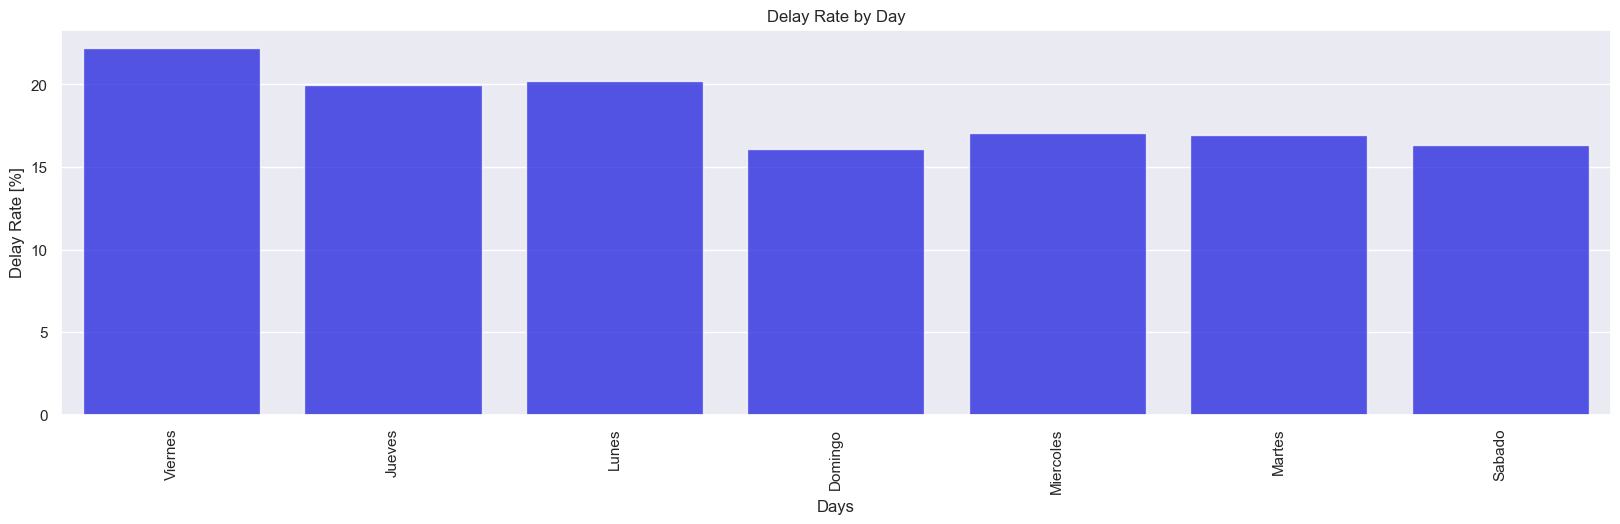

In [21]:
days_rate = get_rate_from_column(data, 'DIANOM')
days_rate_value = data['DIANOM'].value_counts().index

sns.set(style="darkgrid")
plt.figure(figsize = (20, 5))
sns.barplot(x=days_rate_value, y=days_rate['Tasa (%)'], color = 'blue', alpha = 0.75)
plt.title('Delay Rate by Day')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Days', fontsize=12)
plt.xticks(rotation=90)
plt.show()

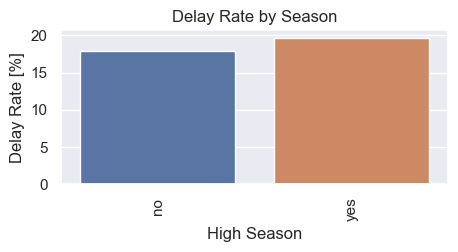

In [22]:
high_season_rate = get_rate_from_column(data, 'high_season')
high_season_rate_values = data['high_season'].value_counts().index

plt.figure(figsize = (5, 2))
sns.set(style="darkgrid")
sns.barplot(x=["no", "yes"], y=high_season_rate['Tasa (%)'])
plt.title('Delay Rate by Season')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('High Season', fontsize=12)
plt.xticks(rotation=90)
plt.show()

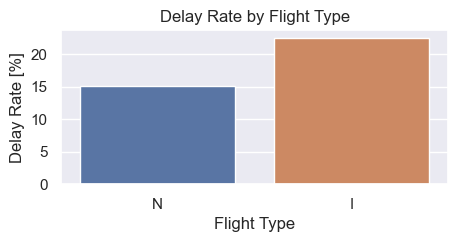

In [23]:
flight_type_rate = get_rate_from_column(data, 'TIPOVUELO')
flight_type_rate_values = data['TIPOVUELO'].value_counts().index
plt.figure(figsize = (5, 2))
sns.set(style="darkgrid")
sns.barplot(x=flight_type_rate_values, y=flight_type_rate['Tasa (%)'])
plt.title('Delay Rate by Flight Type')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Flight Type', fontsize=12)
plt.show()

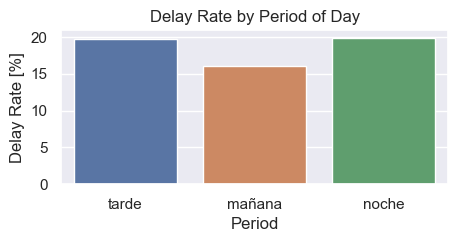

In [24]:
period_day_rate = get_rate_from_column(data, 'period_day')
period_day_rate_values = data['period_day'].value_counts().index
plt.figure(figsize = (5, 2))
sns.set(style="darkgrid")
sns.barplot(x=period_day_rate_values, y=period_day_rate['Tasa (%)'])
plt.title('Delay Rate by Period of Day')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Period', fontsize=12)
plt.show()

## 4. Training

### 4.a. Data Split (Training and Validation)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report

In [26]:
training_data = shuffle(data[['OPERA', 'MES', 'TIPOVUELO', 'SIGLADES', 'DIANOM', 'delay']], random_state = 111)

In [27]:
# sort by date
data['DATE'] = pd.to_datetime(data['Fecha-I'], format='%Y-%m-%d %H:%M:%S') 
data = data.sort_values(by='DATE')


# integer
# DIA
DIA_int = data['DIA']

# one-hot: 
# MES, DIANOM, SIGLAORI, SIGLADES, OPERA, period_day
MES_one_hot = pd.get_dummies(data['MES'], prefix = 'MES')
DIANOM_one_hot = pd.get_dummies(data['DIANOM'], prefix = 'DIANOM')
SIGLADES_one_hot = pd.get_dummies(data['SIGLADES'], prefix = 'SIGLADES')
SIGLAORI_one_hot = pd.get_dummies(data['SIGLAORI'], prefix = 'SIGLAORI')
OPERA_one_hot = pd.get_dummies(data['OPERA'], prefix = 'OPERA')
period_day_one_hot = pd.get_dummies(data['period_day'], prefix = 'period_day')

# binary
# TIPOVUELO, high_season
TIPOVUELO_binary = pd.get_dummies(data['TIPOVUELO'], prefix = 'TIPOVUELO')['TIPOVUELO_I']
high_season_binary = data['high_season']

# circle 
# MES, DIANOM, DIA, HORA
day_to_number = {
    'Lunes': 1, 
    'Martes': 2, 
    'Miercoles': 3, 
    'Jueves': 4,
    'Viernes': 5,
    'Sabado': 6,
    'Domingo': 7
}
def get_day_number_in_week(day_name):
    return day_to_number[day_name]
day_number = data['DIANOM'].apply(get_day_number_in_week)
minute = data['DATE'].dt.hour * 60 + data['DATE'].dt.minute

def cosine(value, max_value):
    return np.cos(2*np.pi*value/max_value)
def sine(value, max_value):
    return np.sin(2*np.pi*value/max_value)


TIME_cos = minute.apply(cosine, args=(24*60,)).rename('TIME_cos')
TIME_sin = minute.apply(sine, args=(24*60,)).rename('TIME_sin')
DIANOM_cos = day_number.apply(cosine, args=(7,)).rename('DIANOM_cos')
DIANOM_sin = day_number.apply(sine, args=(7,)).rename('DIANOM_sin')
MES_cos = data['MES'].apply(cosine, args=(12,)).rename('MES_cos')
MES_sin = data['MES'].apply(sine, args=(12,)).rename('MES_sin')
DIA_cos = data['DIA'].apply(cosine, args=(31,)).rename('DIA_cos')
DIA_sin = data['DIA'].apply(sine, args=(31,)).rename('DIA_sin')



features = pd.concat([
    TIME_cos, 
    TIME_sin,
    DIA_int,
    MES_one_hot,
    DIANOM_one_hot,
    SIGLADES_one_hot,
    SIGLAORI_one_hot,
    OPERA_one_hot,
    period_day_one_hot,
    TIPOVUELO_binary,
    high_season_binary,
    DIANOM_cos,
    DIANOM_sin,
    MES_cos,
    MES_sin,
    DIA_cos,
    DIA_sin],
    axis=1)

target = data['delay']

In [28]:
test_size = 0.33
test_size = int(len(features)*test_size)

train_size = len(features) - test_size

x_train, x_test, y_train, y_test = features.iloc[:train_size], features.iloc[train_size:], target.iloc[:train_size], target.iloc[train_size:]

In [29]:
print(f"train shape: {x_train.shape} | test shape: {x_test.shape}")

train shape: (45699, 119) | test shape: (22507, 119)


In [30]:
y_train.value_counts('%')*100

0    82.968993
1    17.031007
Name: delay, dtype: float64

In [31]:
y_test.value_counts('%')*100

0    78.535567
1    21.464433
Name: delay, dtype: float64

### 4.b. Model Selection

#### 4.b.i. XGBoost

In [32]:
import xgboost as xgb
from xgboost import plot_importance

In [33]:
xgb_model = xgb.XGBClassifier(random_state=1, learning_rate=0.01)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [34]:
xgboost_y_preds = xgb_model.predict(x_test)

xgboost_y_preds = [1 if y_pred > 0.5 else 0 for y_pred in xgboost_y_preds]

In [35]:
confusion_matrix(y_test, xgboost_y_preds)

array([[17676,     0],
       [ 4831,     0]])

In [36]:
print(classification_report(y_test, xgboost_y_preds))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88     17676
           1       0.00      0.00      0.00      4831

    accuracy                           0.79     22507
   macro avg       0.39      0.50      0.44     22507
weighted avg       0.62      0.79      0.69     22507



#### 4.b.ii. Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
reg_model = LogisticRegression()
reg_model.fit(x_train, y_train)

LogisticRegression()

In [39]:
reg_y_preds = reg_model.predict(x_test)

In [40]:
confusion_matrix(y_test, reg_y_preds)

array([[17489,   187],
       [ 4615,   216]])

In [41]:
print(classification_report(y_test, reg_y_preds))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88     17676
           1       0.54      0.04      0.08      4831

    accuracy                           0.79     22507
   macro avg       0.66      0.52      0.48     22507
weighted avg       0.74      0.79      0.71     22507



## 5. Data Analysis: Third Sight

### Feature Importance

<Axes: >

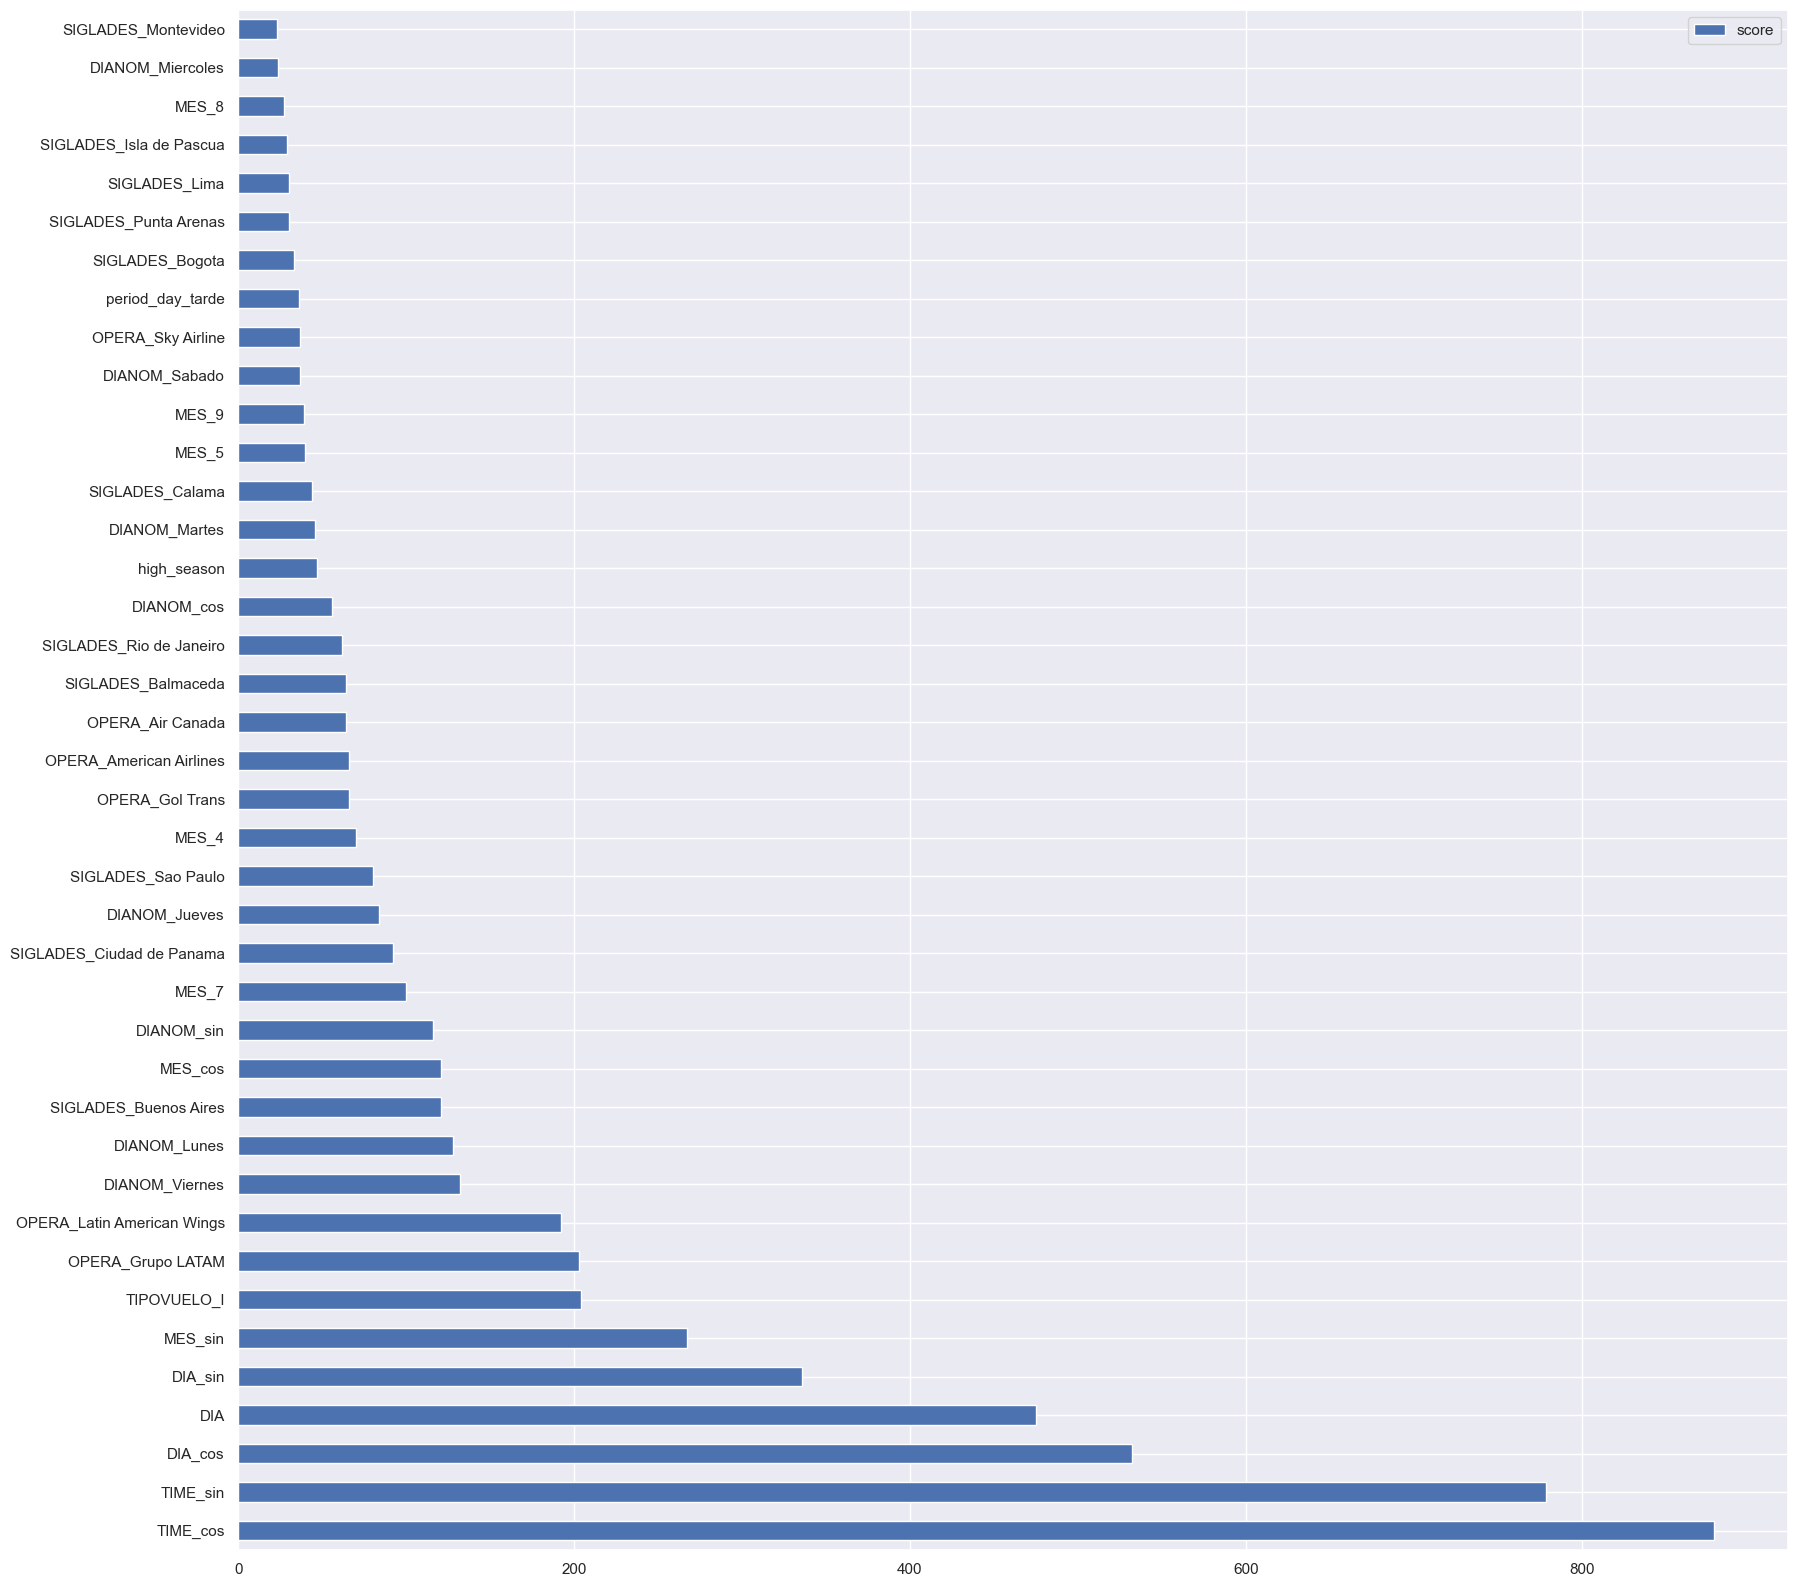

In [42]:
feature_important = xgb_model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
importance = list(feature_important.values())

data = pd.DataFrame(data=importance, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,20)) ## plot top 50 features

In [43]:
'''
top_features = [
    "TIME_sin", 
    "TIME_cos",
    "DIA_cos",
    "DIA",
    "TIPOVUELO_I",
    "OPERA_Grupo LATAM",
    "OPERA_Latin American Wings",
    "OPERA_Sky Airline",
    "MES_7",
    "MES_4",
    "MES_10",
    "MES_11",
    "MES_12",
]
'''

top_features = [key for importance,key in sorted(zip(importance,keys), reverse=True)][:14]
top_features

['TIME_cos',
 'TIME_sin',
 'DIA_cos',
 'DIA',
 'DIA_sin',
 'MES_sin',
 'TIPOVUELO_I',
 'OPERA_Grupo LATAM',
 'OPERA_Latin American Wings',
 'DIANOM_Viernes',
 'DIANOM_Lunes',
 'SIGLADES_Buenos Aires',
 'MES_cos',
 'DIANOM_sin']

### Data Balance

In [44]:
n_y0 = len(y_train[y_train == 0])
n_y1 = len(y_train[y_train == 1])
scale = n_y0/n_y1
print(scale)

4.87164332519594


## 6. Training with Improvement

### 6.a. Data Split

In [45]:
test_size = 0.33
test_size = int(len(features)*test_size)

train_size = len(features) - test_size

x_train2, x_test2, y_train2, y_test2 = features[top_features].iloc[:train_size], features[top_features].iloc[train_size:], target.iloc[:train_size], target.iloc[train_size:]

# x_train2, x_test2, y_train2, y_test2 = train_test_split(features[top_features], target, test_size = 0.33, random_state = 42)

### 6.b. Model Selection

#### 6.b.i. XGBoost with Feature Importance and with Balance

In [46]:
xgb_model_2 = xgb.XGBClassifier(random_state=1, learning_rate=0.01, scale_pos_weight = scale)
xgb_model_2.fit(x_train2, y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [47]:
xgboost_y_preds_2 = xgb_model_2.predict(x_test2)

In [48]:
confusion_matrix(y_test2, xgboost_y_preds_2)

array([[ 7395, 10281],
       [ 1304,  3527]])

In [49]:
print(classification_report(y_test2, xgboost_y_preds_2))

              precision    recall  f1-score   support

           0       0.85      0.42      0.56     17676
           1       0.26      0.73      0.38      4831

    accuracy                           0.49     22507
   macro avg       0.55      0.57      0.47     22507
weighted avg       0.72      0.49      0.52     22507



#### 6.b.ii. XGBoost with Feature Importance but without Balance

In [50]:
xgb_model_3 = xgb.XGBClassifier(random_state=1, learning_rate=0.01)
xgb_model_3.fit(x_train2, y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [51]:
xgboost_y_preds_3 = xgb_model_3.predict(x_test2)

In [52]:
confusion_matrix(y_test2, xgboost_y_preds_3)

array([[17664,    12],
       [ 4795,    36]])

In [53]:
print(classification_report(y_test2, xgboost_y_preds_3))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88     17676
           1       0.75      0.01      0.01      4831

    accuracy                           0.79     22507
   macro avg       0.77      0.50      0.45     22507
weighted avg       0.78      0.79      0.69     22507



#### 6.b.iii. Logistic Regression with Feature Importante and with Balance

In [54]:
reg_model_2 = LogisticRegression(class_weight={1: n_y0/len(y_train), 0: n_y1/len(y_train)})
reg_model_2.fit(x_train2, y_train2)

LogisticRegression(class_weight={0: 0.17031007243046895, 1: 0.8296899275695311})

In [55]:
reg_y_preds_2 = reg_model_2.predict(x_test2)

In [56]:
confusion_matrix(y_test2, reg_y_preds_2)

array([[ 7028, 10648],
       [ 1511,  3320]])

In [57]:
print(classification_report(y_test2, reg_y_preds_2))

              precision    recall  f1-score   support

           0       0.82      0.40      0.54     17676
           1       0.24      0.69      0.35      4831

    accuracy                           0.46     22507
   macro avg       0.53      0.54      0.44     22507
weighted avg       0.70      0.46      0.50     22507



#### 6.b.iv. Logistic Regression with Feature Importante but without Balance

In [58]:
reg_model_3 = LogisticRegression()
reg_model_3.fit(x_train2, y_train2)

LogisticRegression()

In [59]:
reg_y_preds_3 = reg_model_3.predict(x_test2)

In [60]:
confusion_matrix(y_test2, reg_y_preds_3)

array([[17673,     3],
       [ 4800,    31]])

In [61]:
print(classification_report(y_test2, reg_y_preds_3))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88     17676
           1       0.91      0.01      0.01      4831

    accuracy                           0.79     22507
   macro avg       0.85      0.50      0.45     22507
weighted avg       0.81      0.79      0.69     22507



## 7. Data Science Conclusions

By looking at the results of the 6 trained models, it can be determined:
- There is no noticeable difference in results between XGBoost and LogisticRegression.
- Does not decrease the performance of the model by reducing the features to the 10 most important.
- Improves the model's performance when balancing classes, since it increases the recall of class "1".

**With this, the model to be productive must be the one that is trained with the top 10 features and class balancing, but which one?**